In [1]:
import pandas as pd

In [2]:
sales_df = pd.read_csv('sales_raw.csv')

In [3]:
discounts_df = pd.read_csv('discounts_raw.csv')

# EDA

## Приводим типы данных discounts_df к числовым и datetype

In [4]:
discounts_df.head()

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,100551,5.0,159.9,139.9,2023-03-02,2023-03-15
1,100553,5.0,159.9,139.9,2023-03-02,2023-03-15
2,100554,5.0,159.9,139.9,2023-03-02,2023-03-15
3,100558,5.0,159.9,139.9,2023-03-02,2023-03-15
4,100530,2.0,36.9,24.6,2021-09-09,2021-09-22


In [5]:
discounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   item_id                  2081 non-null   int64  
 1   promo_typeCode           2041 non-null   float64
 2   sale_price_before_promo  2081 non-null   float64
 3   sale_price_time_promo    2081 non-null   float64
 4   date_start               2081 non-null   object 
 5   date_end                 2081 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 97.7+ KB


In [6]:
discounts_df['date_start'] = pd.to_datetime(discounts_df['date_start'])
discounts_df['date_end'] = pd.to_datetime(discounts_df['date_end'])

In [7]:
discounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   item_id                  2081 non-null   int64         
 1   promo_typeCode           2041 non-null   float64       
 2   sale_price_before_promo  2081 non-null   float64       
 3   sale_price_time_promo    2081 non-null   float64       
 4   date_start               2081 non-null   datetime64[ns]
 5   date_end                 2081 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 97.7 KB


## Проверяем/Исправляем наличие пустых ячеек discounts_df

In [8]:
print(f'Missing values: {discounts_df.isnull().sum().values.sum()}')
discounts_df.isnull().sum()

Missing values: 40


item_id                     0
promo_typeCode             40
sale_price_before_promo     0
sale_price_time_promo       0
date_start                  0
date_end                    0
dtype: int64

### заполняем пустоты с moda[0]

In [9]:
discounts_df= discounts_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [10]:
discounts_df.isnull().sum()

item_id                    0
promo_typeCode             0
sale_price_before_promo    0
sale_price_time_promo      0
date_start                 0
date_end                   0
dtype: int64

In [11]:
discounts_df.groupby('promo_typeCode').count()

,item_id,sale_price_before_promo,sale_price_time_promo,date_start,date_end
promo_typeCode,,,,,
1.0,5,5,5,5,5
2.0,9,9,9,9,9
5.0,986,986,986,986,986
6.0,796,796,796,796,796
7.0,5,5,5,5,5
8.0,74,74,74,74,74
10.0,157,157,157,157,157
16.0,6,6,6,6,6
23.0,5,5,5,5,5


## Приводим типы данных sales_df к числовым и datetype

In [12]:
print('sales shape: ', sales_df.shape)
sales_df.head()

sales shape:  (147143, 3)


,date,item_id,qnty
0,2017-01-01,100001,7.0
1,2017-01-01,100003,2.0
2,2017-01-01,100006,13.0
3,2017-01-01,100010,5.0
4,2017-01-01,100035,53.0


In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147143 entries, 0 to 147142
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     147143 non-null  object 
 1   item_id  147143 non-null  int64  
 2   qnty     147143 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ MB


In [14]:
sales_df['date'] = pd.to_datetime(sales_df['date'])

In [15]:
print(f'Missing values: {sales_df.isnull().sum().values.sum()}')
sales_df.isnull().sum()

Missing values: 0


date       0
item_id    0
qnty       0
dtype: int64

## Список товаров которые участвовали в продажах в декабре 2023

In [16]:
dec_sales_items = sales_df['item_id'][(sales_df['date']<'2024-01-01')&(sales_df['date']>'2023-11-30')].reset_index()
dec_sales_items = dec_sales_items['item_id']
dec_sales_items_list = pd.unique(dec_sales_items)

In [17]:
dec_sales_items_list

array([100545, 100645, 100683, 100612, 100165, 100611, 100006, 100601,
       100126, 100657, 100035, 100523, 100656, 100604, 100602, 100050,
       100646, 100663, 100558, 100553, 100517, 100448, 100390, 100644,
       100607, 100516, 100486, 100188, 100591, 100556, 100650, 100510,
       100010, 100259, 100192, 100182, 100454, 100193, 100455, 100346,
       100525, 100638, 100544, 100651, 100524, 100551, 100003, 100613,
       100245, 100590, 100354, 100614, 100450,  11200, 100348, 100528,
       100139, 100227, 100257, 100140, 100045, 100469, 100691, 100470,
       100639, 100648, 100621, 100001, 100176, 100228, 100530, 100471,
       100417, 100668, 100596, 100686, 100399, 100554, 100664, 100418,
       100394, 100665, 100487, 100473, 100370, 100547, 100181, 100184,
       100526, 100462, 100453, 100225, 100474, 100386, 100375, 100046,
       100662], dtype=int64)

## Графики

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sales_groupby_df = sales_df[(sales_df['item_id'].isin(dec_sales_items_list))]
sales_groupby_df = sales_groupby_df.groupby('date').sum().reset_index()
sales_groupby_df['date'] = pd.to_datetime(sales_groupby_df['date'])
sales_groupby_df.drop(columns=['item_id'], inplace=True)

In [20]:
sales_groupby_df = sales_groupby_df[(sales_groupby_df['date']<'2024-01-01')&(sales_groupby_df['date']>'2023-11-30')]
sales_groupby_df.head(5)
# sales_groupby_df.info()

,date,qnty
2525,2023-12-01,381.0
2526,2023-12-02,402.0
2527,2023-12-03,302.0
2528,2023-12-04,589.0
2529,2023-12-05,610.0


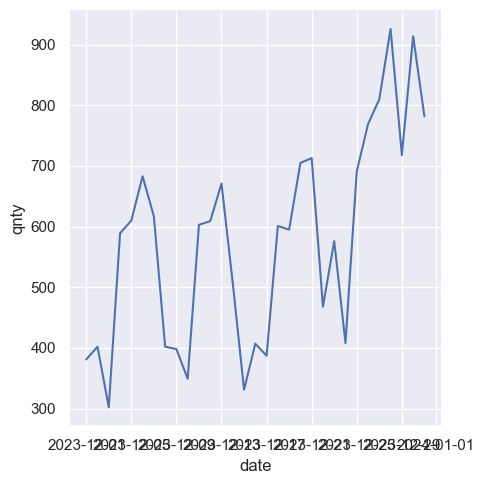

In [21]:
sns.set_theme()
sns.relplot(data = sales_groupby_df, kind = 'line', x = 'date', y = 'qnty',
    facet_kws=dict(sharex=False))

# Подгатовка данных для обучения

у нас есть 3 df и 1 лист с которыми будем работать 
но нужно их объеденить
1. discounts_df_1
2. sales_df
3. dec_sales_items_list - items_id товаров которые продавались в декабре 2023

## Функции

In [22]:
discounts_df.shape, sales_df.shape

((2081, 6), (147143, 3))

In [23]:
def format_df(salesdf, item_list, discountsdf):
    r_dataset = pd.DataFrame(columns=['date', 'item_id', 'promo_typeCode', 'sale_price', 'discount', 'sold'])
    for index, row in salesdf.iterrows():
        if row['item_id'] in item_list:
            x = discountsdf[(discountsdf['item_id'] == row['item_id']) & (row['date']>discountsdf['date_start']) & (row['date']<discountsdf['date_end'])]
            if len(x)==1:
                r_dataset.loc[len(r_dataset.index)] = [row['date'], row['item_id'], x.iloc[0]['promo_typeCode'], x.iloc[0]['sale_price_time_promo'], 
                                                       1-(x.iloc[0]['sale_price_time_promo']/x.iloc[0]['sale_price_before_promo']) , row['qnty']]
            elif x.empty:
                y = discountsdf[(discountsdf['item_id'] == row['item_id']) & (row['date']>discountsdf['date_start']) & (discountsdf['date_start'] <= discountsdf['date_start'].min())]
                if not y.empty:
                    r_dataset.loc[len(r_dataset.index)] = [row['date'], row['item_id'], 0.0, y.iloc[0]['sale_price_before_promo'], 0.0 , row['qnty']]
            else:
                x = x[x['sale_price_time_promo'] == x['sale_price_time_promo'].min()]
                r_dataset.loc[len(r_dataset.index)] = [row['date'], row['item_id'], x.iloc[0]['promo_typeCode'], x.iloc[0]['sale_price_time_promo'], 
                                                       1-(x.iloc[0]['sale_price_time_promo']/x.iloc[0]['sale_price_before_promo']), row['qnty']]
    data_dummyes = pd.get_dummies(r_dataset['promo_typeCode'], prefix='promo', drop_first=True, dtype=float)
    r_dataset = pd.concat([r_dataset, data_dummyes], axis=1)
    r_dataset = r_dataset.drop(['promo_typeCode'], axis=1)
    return r_dataset

In [24]:
def format_predict_df(salesdf, item_list, discountsdf):
    r_dataset = pd.DataFrame(columns=['date', 'item_id', 'promo_typeCode', 'sale_price', 'discount'])
    for index, row in salesdf.iterrows():
        for item_id in item_list:
            x = discountsdf[(discountsdf['item_id'] == item_id) & (row['date']>discountsdf['date_start']) & (row['date']<discountsdf['date_end'])]
            if len(x)==1:
                r_dataset.loc[len(r_dataset.index)] = [row['date'], item_id, x.iloc[0]['promo_typeCode'], x.iloc[0]['sale_price_time_promo'], 
                                                       1-(x.iloc[0]['sale_price_time_promo']/x.iloc[0]['sale_price_before_promo'])]
            elif x.empty:
                y = discountsdf[(discountsdf['item_id'] == item_id) & (row['date']>discountsdf['date_start']) & (discountsdf['date_start'] <= discountsdf['date_start'].min())]
                if not y.empty:
                    r_dataset.loc[len(r_dataset.index)] = [row['date'], item_id, 0.0, y.iloc[0]['sale_price_before_promo'], 0.0]
            else:
                x = x[x['sale_price_time_promo'] == x['sale_price_time_promo'].min()]
                r_dataset.loc[len(r_dataset.index)] = [row['date'], item_id, x.iloc[0]['promo_typeCode'], x.iloc[0]['sale_price_time_promo'],
                                                      1-(x.iloc[0]['sale_price_time_promo']/x.iloc[0]['sale_price_before_promo'])]

    data_dummyes = pd.get_dummies(r_dataset['promo_typeCode'], prefix='promo', drop_first=True, dtype=float)
    r_dataset = pd.concat([r_dataset, data_dummyes], axis=1)
    r_dataset = r_dataset.drop(['promo_typeCode'], axis=1)
    r_dataset['promo_1.0']=0.0
    r_dataset['promo_2.0']=0.0
    r_dataset['promo_7.0']=0.0
    r_dataset['promo_10.0']=0.0
    r_dataset['promo_16.0']=0.0
    r_dataset = r_dataset[['date', 'item_id', 'sale_price', 'discount', 'promo_1.0', 'promo_2.0','promo_5.0','promo_6.0','promo_7.0','promo_8.0', 'promo_10.0', 'promo_16.0','promo_44.0']]
    return r_dataset

In [25]:
pred_start_date = pd.to_datetime('2024-01-01')
pred_end_date = pd.to_datetime('2024-01-31')
pred_date_range = pd.date_range(start=pred_start_date, end=pred_end_date)
pred_df_dates = pd.DataFrame()
pred_df_dates['date'] = pred_date_range
pred_df_dates.tail()

,date
26,2024-01-27
27,2024-01-28
28,2024-01-29
29,2024-01-30
30,2024-01-31


## Данные для обучения

In [26]:
discounts_df.head()

,item_id,promo_typeCode,sale_price_before_promo,sale_price_time_promo,date_start,date_end
0,100551,5.0,159.9,139.9,2023-03-02,2023-03-15
1,100553,5.0,159.9,139.9,2023-03-02,2023-03-15
2,100554,5.0,159.9,139.9,2023-03-02,2023-03-15
3,100558,5.0,159.9,139.9,2023-03-02,2023-03-15
4,100530,2.0,36.9,24.6,2021-09-09,2021-09-22


In [28]:
# долго
train_df = format_df(sales_df, dec_sales_items_list,discounts_df)

In [27]:
pred_df = format_predict_df(pred_df_dates, dec_sales_items_list, discounts_df)

### dummies for item_id

In [54]:
item_id_dummyes = pd.get_dummies(train_df['item_id'], prefix='item_id', drop_first=True, dtype=float)
item_id_dummyes.head()

,item_id_100046,item_id_100050,item_id_100126,item_id_100139,item_id_100140,item_id_100165,item_id_100184,item_id_100192,item_id_100193,item_id_100225,...,item_id_100656,item_id_100657,item_id_100662,item_id_100663,item_id_100664,item_id_100665,item_id_100668,item_id_100683,item_id_100686,item_id_100691
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
train_df_2 = pd.concat([train_df.drop(['item_id'], axis = 1), item_id_dummyes], axis=1)
train_df_2.head()

,date,sale_price,sold,promo_1.0,promo_2.0,promo_5.0,promo_6.0,promo_7.0,promo_8.0,promo_10.0,...,item_id_100656,item_id_100657,item_id_100662,item_id_100663,item_id_100664,item_id_100665,item_id_100668,item_id_100683,item_id_100686,item_id_100691
0,1578009600000000000,99.9,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1578009600000000000,39.9,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1578009600000000000,99.9,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1578009600000000000,169.9,22.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1578009600000000000,59.9,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
train_df_2 = train_df_2[[c for c in train_df_2 if c not in ['sold']] + ['sold']]
train_df_2.head()

,date,sale_price,promo_1.0,promo_2.0,promo_5.0,promo_6.0,promo_7.0,promo_8.0,promo_10.0,promo_16.0,...,item_id_100657,item_id_100662,item_id_100663,item_id_100664,item_id_100665,item_id_100668,item_id_100683,item_id_100686,item_id_100691,sold
0,1578009600000000000,99.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
1,1578009600000000000,39.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1578009600000000000,99.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3,1578009600000000000,169.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
4,1578009600000000000,59.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0


In [71]:
train_df_2.iloc[:,:-1]

,date,sale_price,promo_1.0,promo_2.0,promo_5.0,promo_6.0,promo_7.0,promo_8.0,promo_10.0,promo_16.0,...,item_id_100656,item_id_100657,item_id_100662,item_id_100663,item_id_100664,item_id_100665,item_id_100668,item_id_100683,item_id_100686,item_id_100691
0,1578009600000000000,99.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1578009600000000000,39.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1578009600000000000,99.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1578009600000000000,169.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1578009600000000000,59.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25249,1703980800000000000,59.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25250,1703980800000000000,269.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25251,1703980800000000000,139.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25252,1703980800000000000,689.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Обучение

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

import numpy as np
from math import sqrt, ceil
import datetime as dt

In [32]:
train_df_lr = train_df.copy()
pred_df_lr = pred_df.copy()

In [33]:
train_df_lr['date'] = pd.to_numeric(train_df_lr['date'])
pred_df_lr['date'] = pd.to_numeric(pred_df_lr['date'])

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(train_df_2.iloc[:,:-1], train_df_2.iloc[:,-1], test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(train_df_lr.drop(['sold'], axis=1), train_df_lr['sold'], test_size=0.25, random_state=42)

## Линейная регрессия

In [35]:
linreg_model = LinearRegression()

In [36]:
linreg_model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = linreg_model.predict(X_test)
rms = sqrt(mean_squared_error(y_pred, y_test))
print(f'RMSE value: {rms}')

RMSE value: 11.668630011281415


In [38]:
lr_jan_pred = linreg_model.predict(pred_df_lr)

## ARIMA

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [40]:
result = adfuller(train_df_lr['sold'])
print('ADF статистика:', result[0])
print('p-значение:', result[1])
print('Критические значения:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

ADF статистика: -12.932072629996156
p-значение: 3.682678598872523e-24
Критические значения:
  1%: -3.4306129347081864
  5%: -2.8616562091540816
  10%: -2.566831854739424


In [41]:
model = ARIMA(train_df_lr['sold'], order=(1, 1, 1))
model_fit = model.fit()

# Вывод статистики модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   sold   No. Observations:                24920
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -94650.032
Date:                Wed, 31 Jul 2024   AIC                         189306.064
Time:                        10:32:06   BIC                         189330.435
Sample:                             0   HQIC                        189313.953
                              - 24920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0249      0.004      5.748      0.000       0.016       0.033
ma.L1         -0.9765      0.001  -1025.165      0.000      -0.978      -0.975
sigma2       116.5832      0.198    587.950      0.0

In [42]:
# Прогноз на основе обученной модели
forecast = model_fit.forecast(steps=12)

# Рассчитываем MSE и rmse
mse = mean_squared_error(train_df_lr['sold'][-12:], forecast)
rmse = sqrt(mse)

print(f'MSE: {mse}')
print(f'rmse: {rmse}')

MSE: 335.9979580826894
rmse: 18.330247081877793


## k near

In [43]:
shape = train_df.shape[0]
ttrain_set=train_df.iloc[:ceil(shape*0.75)]
ttest_set=train_df.iloc[ceil(shape*0.75):]
x_ttrain = ttrain_set.drop('sold', axis=1)
x_ttest = ttest_set.drop('sold', axis=1)
x_ttrain['date'] = ttrain_set['date'].map(dt.datetime.toordinal)
y_ttrain = ttrain_set['sold']
x_ttest['date'] = ttest_set['date'].map(dt.datetime.toordinal)
y_ttest = ttest_set['sold']

In [44]:
params = {'n_neighbors': [2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)


In [45]:
model.fit(x_ttrain, y_ttrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [46]:
knn_preds = model.predict(x_ttest)

In [47]:
rms = sqrt(mean_squared_error(knn_preds, y_ttest))
print(f'RMSE value: {rms}')

RMSE value: 6.89774036241482


In [48]:
knn_jan_data = format_predict_df(pred_df_dates, dec_sales_items_list, discounts_df)
knn_jan_data['date'] = knn_jan_data['date'].map(dt.datetime.toordinal)

In [49]:
knn_result = model.predict(knn_jan_data)

# Результат

В результате knn дал более низкую ошибку
1. knn rmse = 6.89
2. lr rmse  = 11.66
3. arima rmse = 18

In [50]:
jan2024_df = format_predict_df(pred_df_dates, dec_sales_items_list, discounts_df)

In [51]:
knn_result = pd.DataFrame(knn_result, columns=['knn_result'])

In [52]:
lr_result = pd.DataFrame(lr_jan_pred, columns=['lr_result'])

In [53]:
jan2024_df_knn = pd.concat([jan2024_df[['date', 'item_id']],knn_result], axis =1 )

In [54]:
jan2024_df_lr = pd.concat([jan2024_df[['date', 'item_id']], lr_result], axis =1 )


In [55]:
jan2024_df_knn.to_csv('jan2024_df_knn.csv', sep=';')
jan2024_df_knn

,date,item_id,knn_result
0,2024-01-01,100545,2.333333
1,2024-01-01,100645,4.333333
2,2024-01-01,100165,4.777778
3,2024-01-01,100126,1.888889
4,2024-01-01,100656,4.333333
...,...,...,...
805,2024-01-31,100370,3.222222
806,2024-01-31,100184,4.777778
807,2024-01-31,100453,2.444444
808,2024-01-31,100474,2.444444


In [56]:
jan2024_df_lr

,date,item_id,lr_result
0,2024-01-01,100545,3.793502
1,2024-01-01,100645,4.636353
2,2024-01-01,100165,5.498663
3,2024-01-01,100126,0.135256
4,2024-01-01,100656,4.631773
...,...,...,...
805,2024-01-31,100370,1.120870
806,2024-01-31,100184,5.030047
807,2024-01-31,100453,4.476325
808,2024-01-31,100474,5.351929
